<a href="https://colab.research.google.com/github/AxxA3205/2311102157_Mahija_Danadyaksa_Sadtomo/blob/main/TUBES_DKA_FCM_2311102157_%26_2311102185.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # LANGKAH 1: Data Understanding & Praproses

1. Import Library & Load Dataset

In [1]:
!pip install fuzzywuzzy # Install the fuzzywuzzy module using pip
import pandas as pd
from fuzzywuzzy import process
from sklearn.preprocessing import MinMaxScaler

# Load data
data_parkir = pd.read_excel('/content/Data_Parkir_PWT.xlsx')
titik_koordinat = pd.read_excel('/content/titik_koordinat.xlsx')

/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


2. Perbaiki Nama Lokasi (Fuzzy Matching)

In [2]:
# Ambil daftar nama lokasi referensi dari titik koordinat
lokasi_ref = titik_koordinat['Lokasi'].astype(str).tolist()

# Buat kolom lokasi yang sudah dibersihkan
data_parkir['Lokasi_Bersih'] = data_parkir['Lokasi'].apply(
    lambda x: process.extractOne(str(x), lokasi_ref)[0]
)


3. Gabungkan Data Parkir dan Koordinat

In [32]:
# Merge berdasarkan nama lokasi bersih
data_gabungan = pd.merge(data_parkir, titik_koordinat, left_on='Lokasi_Bersih', right_on='Lokasi', how='inner')

# Cek hasil
data_gabungan[['Lokasi_Bersih', 'Latitude', 'Longitude']]


,Lokasi_Bersih,Latitude,Longitude
0,Popular-Finance,-7.441736,109.237561
1,Toko Satria,-7.423124,109.246108
2,Toko Mlati,-7.427051,109.243659
3,Toko Pagoda,-7.427118,109.243593
4,Matahari Bazzar,-7.429671,109.248859
...,...,...,...
436,Alfamart Wahid Hasyim,-7.451336,109.242715
437,Indomart Wahid Hasyim,-7.451531,109.242686
438,Rocket Chicken Wahid Hasyim,-7.451580,109.242676
439,Salsa Snack,-7.443617,109.235868


,Lokasi_Bersih,Latitude,Longitude
0,Popular-Finance,-7.441736,109.237561
1,Toko Satria,-7.423124,109.246108
2,Toko Mlati,-7.427051,109.243659
3,Toko Pagoda,-7.427118,109.243593
4,Matahari Bazzar,-7.429671,109.248859
...,...,...,...
436,Alfamart Wahid Hasyim,-7.451336,109.242715
437,Indomart Wahid Hasyim,-7.451531,109.242686
438,Rocket Chicken Wahid Hasyim,-7.451580,109.242676
439,Salsa Snack,-7.443617,109.235868


from matplotlib import pyplot as plt
_df_0['Latitude'].plot(kind='hist', bins=20, title='Latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['Longitude'].plot(kind='hist', bins=20, title='Longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='Latitude', y='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Latitude'].plot(kind='line', figsize=(8, 4), title='Latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['Longitude'].plot(kind='line', figsize=(8, 4), title='Longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_5['Latitude'].plot(kind='hist', bins=20, title='Latitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Longitude'].plot(kind='hist', bins=20, title='Longitude')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Latitude', y='Longitude', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Latitude'].plot(kind='line', figsize=(8, 4), title='Latitude')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Longitude'].plot(kind='line', figsize=(8, 4), title='Longitude')
plt.gca().spines[['top', 'right']].set_visible(False)

4. Seleksi dan Agregasi Fitur

In [4]:
# Ambil fitur penting saja
fitur = [
    'Lokasi_Bersih', 'Jenis_Kendaraan', 'Hari', 'Total_Sehari',
    'Sirkulasi_Kendaraan_Ramai', 'Banyak_Kendaraan_Ramai', 'Tarif_Parkir',
    'Latitude', 'Longitude'
]

data_fitur = data_gabungan[fitur]

# Hitung rata-rata harian per lokasi dan jenis kendaraan
data_aggregated = data_fitur.groupby(['Lokasi_Bersih', 'Jenis_Kendaraan']).agg({
    'Total_Sehari': 'mean',
    'Sirkulasi_Kendaraan_Ramai': 'mean',
    'Banyak_Kendaraan_Ramai': 'mean',
    'Tarif_Parkir': 'mean',
    'Latitude': 'first',
    'Longitude': 'first'
}).reset_index()

# Pivot ke bentuk 1 baris per lokasi (motor/mobil jadi kolom terpisah)
data_pivot = data_aggregated.pivot(index=['Lokasi_Bersih', 'Latitude', 'Longitude'], columns='Jenis_Kendaraan')
data_pivot.columns = ['_'.join(col).strip() for col in data_pivot.columns.values]
data_pivot = data_pivot.reset_index()


5. Normalisasi Fitur Numerik

In [5]:
# Pilih fitur numerik yang akan dinormalisasi
fitur_numerik = [
    'Total_Sehari_Mobil', 'Total_Sehari_Motor',
    'Sirkulasi_Kendaraan_Ramai_Mobil', 'Sirkulasi_Kendaraan_Ramai_Motor',
    'Banyak_Kendaraan_Ramai_Mobil', 'Banyak_Kendaraan_Ramai_Motor',
    'Tarif_Parkir_Mobil', 'Tarif_Parkir_Motor'
]

# Isi NaN dengan 0 sebelum normalisasi
data_pivot[fitur_numerik] = data_pivot[fitur_numerik].fillna(0)

# Normalisasi dengan MinMaxScaler
scaler = MinMaxScaler()
data_pivot_norm = data_pivot.copy()
data_pivot_norm[fitur_numerik] = scaler.fit_transform(data_pivot[fitur_numerik])

# Tampilkan hasil
data_pivot_norm.head()


,Lokasi_Bersih,Latitude,Longitude,Total_Sehari_Mobil,Total_Sehari_Motor,Total_Sehari_mobil,Total_Sehari_motor,Sirkulasi_Kendaraan_Ramai_Mobil,Sirkulasi_Kendaraan_Ramai_Motor,Sirkulasi_Kendaraan_Ramai_mobil,Sirkulasi_Kendaraan_Ramai_motor,Banyak_Kendaraan_Ramai_Mobil,Banyak_Kendaraan_Ramai_Motor,Banyak_Kendaraan_Ramai_mobil,Banyak_Kendaraan_Ramai_motor,Tarif_Parkir_Mobil,Tarif_Parkir_Motor,Tarif_Parkir_mobil,Tarif_Parkir_motor
0,ANS,-7.437252,109.244353,0.095238,0.115854,18.0,38.0,0.111111,0.148148,2.000000,4.000000,0.115385,0.166667,3.0,7.000000,1.0,1.0,2000.0,1000.0
1,Abata,-7.429013,109.243319,0.121693,0.280488,25.0,98.0,0.111111,0.259259,2.000000,8.000000,0.076923,0.285714,3.0,13.000000,1.0,1.0,2000.0,1000.0
2,Adi Permana,-7.437939,109.244006,0.158730,0.121951,30.0,40.0,0.166667,0.111111,3.000000,3.000000,0.192308,0.190476,5.0,8.000000,1.0,1.0,2000.0,1000.0
3,Alfamart (dekat telkom),-7.434722,109.248673,0.042328,0.182927,9.0,67.0,0.055556,0.111111,1.000000,5.000000,0.038462,0.214286,2.0,7.000000,1.0,1.0,2000.0,1000.0
4,Alfamart Karanglewas 1,-7.419420,109.200429,0.000000,0.000000,18.0,150.0,0.000000,0.000000,1.666667,10.333333,0.000000,0.000000,2.0,16.333333,0.0,0.0,2000.0,1000.0


# LANGKAH 2: Membuat Label Kemacetan Berdasarkan Skor

1. Buat Skor Kemacetan

In [6]:
# Salin dataframe hasil normalisasi sebelumnya
df_label = data_pivot_norm.copy()

# Pastikan tidak ada nilai NaN
df_label = df_label.fillna(0)

# Hitung skor kemacetan (nilai antara -inf sampai +inf, tapi nanti digunakan untuk klasifikasi)
df_label['kemacetan_skor'] = (
    0.5 * (df_label['Total_Sehari_Mobil'] + df_label['Total_Sehari_Motor']) +
    0.3 * (df_label['Sirkulasi_Kendaraan_Ramai_Mobil'] + df_label['Sirkulasi_Kendaraan_Ramai_Motor']) -
    0.2 * (df_label['Tarif_Parkir_Mobil'] + df_label['Tarif_Parkir_Motor'])
)


2. Kategorikan Skor ke Label Kemacetan

In [7]:
# Fungsi untuk konversi skor ke label
def label_kemacetan(skor):
    if skor >= 0.7:
        return 'Macet Tinggi'
    elif skor >= 0.4:
        return 'Macet Sedang'
    else:
        return 'Macet Rendah'

# Terapkan ke kolom baru
df_label['label_kemacetan'] = df_label['kemacetan_skor'].apply(label_kemacetan)


3. Cek Distribusi Label

In [8]:
df_label['label_kemacetan'].value_counts()


,count
label_kemacetan,
Macet Rendah,109
Macet Sedang,2


4. (Opsional) Visualisasi Distribusi

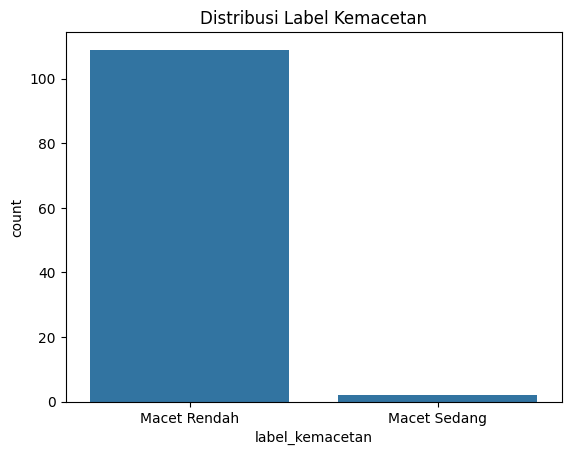

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=df_label, x='label_kemacetan')
plt.title('Distribusi Label Kemacetan')
plt.show()


# LANGKAH 3: Implementasi Fuzzy C-Means (FCM)

1. Install & Import Library FCM

In [10]:
!pip install scikit-fuzzy
import numpy as np
import skfuzzy as fuzz


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.1 MB/s eta 0:00:00


2. Siapkan Data untuk Clustering

In [11]:
# Fitur numerik yang digunakan untuk FCM
fitur_fcm = [
    'Total_Sehari_Mobil', 'Total_Sehari_Motor',
    'Sirkulasi_Kendaraan_Ramai_Mobil', 'Sirkulasi_Kendaraan_Ramai_Motor',
    'Banyak_Kendaraan_Ramai_Mobil', 'Banyak_Kendaraan_Ramai_Motor',
    'Tarif_Parkir_Mobil', 'Tarif_Parkir_Motor'
]

# Buat matriks fitur (transpose → dimensi fitur × sampel)
X = df_label[fitur_fcm].values.T


3. Jalankan Fuzzy C-Means Clustering

In [12]:
n_cluster = 3
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X, c=n_cluster, m=2, error=0.005, maxiter=1000, init=None
)


4. Ambil Hasil Cluster (Label Paling Dominan)

In [13]:
# Untuk setiap titik, ambil cluster dengan membership tertinggi
cluster_labels = np.argmax(u, axis=0)

# Tambahkan ke dataframe
df_label['cluster_fcm'] = cluster_labels


5. Lihat Hasil Clustering

In [14]:
df_label[['Lokasi_Bersih', 'cluster_fcm', 'label_kemacetan']].head()


,Lokasi_Bersih,cluster_fcm,label_kemacetan
0,ANS,2,Macet Rendah
1,Abata,2,Macet Rendah
2,Adi Permana,2,Macet Rendah
3,Alfamart (dekat telkom),2,Macet Rendah
4,Alfamart Karanglewas 1,1,Macet Rendah


from matplotlib import pyplot as plt
_df_10['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11['cluster_fcm'].plot(kind='hist', bins=20, title='cluster_fcm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_12.groupby('Lokasi_Bersih').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13.plot(kind='scatter', x='index', y='cluster_fcm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['cluster_fcm']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_14.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Lokasi_Bersih')):
  _plot_series(series, series_name, i)
  fig.legend(title='Lokasi_Bersih', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('cluster_fcm')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_15.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Lokasi_Bersih')):
  _plot_series(series, series_name, i)
  fig.legend(title='Lokasi_Bersih', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_16['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_17['cluster_fcm'].plot(kind='line', figsize=(8, 4), title='cluster_fcm')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_18['Lokasi_Bersih'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_18, x='index', y='Lokasi_Bersih', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_19['Lokasi_Bersih'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_19, x='cluster_fcm', y='Lokasi_Bersih', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

6. Cek Komposisi Cluster

In [15]:
df_label['cluster_fcm'].value_counts()


,count
cluster_fcm,
2,54
1,35
0,22


7. Tampilkan Nilai FPC (Evaluasi Unsupervised)

In [16]:
print("Fuzzy Partition Coefficient (FPC):", fpc)


Fuzzy Partition Coefficient (FPC): 0.8194468112951058


# LANGKAH 4: Evaluasi Hasil Clustering FCM

1. Evaluasi Unsupervised

a. Fuzzy Partition Coefficient (FPC)

In [17]:
print("Fuzzy Partition Coefficient (FPC):", fpc)


Fuzzy Partition Coefficient (FPC): 0.8194468112951058


Nilai FPC mendekati 1 = cluster jelas dan tidak terlalu tumpang tindih.
Nilai < 0.6 = perlu dievaluasi jumlah cluster atau kualitas fitur.



b. Silhouette Score

In [18]:
from sklearn.metrics import silhouette_score

# Silhouette hanya bisa pakai data sample × fitur
X_transposed = X.T
silhouette = silhouette_score(X_transposed, df_label['cluster_fcm'])

print("Silhouette Score:", silhouette)


Silhouette Score: 0.6015181505586644


c. Davies-Bouldin Index (DBI)

In [19]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(X_transposed, df_label['cluster_fcm'])

print("Davies-Bouldin Index:", dbi)


Davies-Bouldin Index: 0.8597442320552348


2. Evaluasi Supervised (F1-Score, Akurasi)

a. Encoding Label Kemacetan

In [20]:
from sklearn.preprocessing import LabelEncoder

# Ubah label kategori ke angka
encoder = LabelEncoder()
true_labels = encoder.fit_transform(df_label['label_kemacetan'])
predicted_labels = df_label['cluster_fcm']


b. Hitung F1-Score, Akurasi, dsb

In [21]:
from sklearn.metrics import classification_report, confusion_matrix

# Dapatkan label yang muncul di y_true
label_kelas = sorted(set(true_labels) & set(predicted_labels))  # ambil yang muncul di keduanya

print("Classification Report:\n")
print(classification_report(
    true_labels, predicted_labels,
    labels=label_kelas,
    target_names=encoder.inverse_transform(label_kelas)
))

print("Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels, labels=label_kelas))


Classification Report:

              precision    recall  f1-score   support

Macet Rendah       0.91      0.18      0.31       109
Macet Sedang       0.00      0.00      0.00         2

   micro avg       0.35      0.18      0.24       111
   macro avg       0.45      0.09      0.15       111
weighted avg       0.89      0.18      0.30       111

Confusion Matrix:
[[20 35]
 [ 2  0]]


# LANGKAH 5: Visualisasi Peta Interaktif (Folium)

1. Install dan Import Library Folium

In [22]:
!pip install folium
import folium
from folium.plugins import MarkerCluster


2. Siapkan Fungsi Warna untuk Cluster

In [23]:
# Buat fungsi untuk memberi warna sesuai cluster
def warna_cluster(cluster):
    warna = ['green', 'orange', 'red']
    return warna[cluster] if cluster < len(warna) else 'blue'


3. Buat Peta Folium

In [24]:
# Tentukan pusat peta (misal rata-rata koordinat)
center_lat = df_label['Latitude'].mean()
center_lon = df_label['Longitude'].mean()

m = folium.Map(location=[center_lat, center_lon], zoom_start=14)
marker_cluster = MarkerCluster().add_to(m)

# Tambahkan marker untuk setiap lokasi
for _, row in df_label.iterrows():
    lokasi = row['Lokasi_Bersih']
    lat = row['Latitude']
    lon = row['Longitude']
    cluster = row['cluster_fcm']
    label = row['label_kemacetan']

    popup_text = f"<b>{lokasi}</b><br>Cluster: {cluster}<br>Label Kemacetan: {label}"
    folium.Marker(
        location=[lat, lon],
        popup=folium.Popup(popup_text, max_width=300),
        icon=folium.Icon(color=warna_cluster(cluster))
    ).add_to(marker_cluster)

m


4. (Opsional) Simpan ke File HTML

In [25]:
m.save("hasil_peta_cluster_kemacetan.html")


# LANGKAH 6: Fuzzy Decision Tree (FID3) sebagai Metode Pembanding

1. Import Library & Siapkan Data

In [26]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


2. Siapkan Fitur dan Label

In [28]:
# Ambil fitur numerik hasil normalisasi
X = df_label[[
    'Total_Sehari_Mobil', 'Total_Sehari_Motor',
    'Sirkulasi_Kendaraan_Ramai_Mobil', 'Sirkulasi_Kendaraan_Ramai_Motor',
    'Banyak_Kendaraan_Ramai_Mobil', 'Banyak_Kendaraan_Ramai_Motor',
    'Tarif_Parkir_Mobil', 'Tarif_Parkir_Motor'
]]

# Ambil label kemacetan (kategorikal)
y = df_label['label_kemacetan']

# Encode label kategori menjadi numerik
encoder_dt = LabelEncoder()
y_encoded = encoder_dt.fit_transform(y)


3. Latih & Evaluasi Model (Tanpa Split)

In [29]:
# Latih decision tree langsung dengan seluruh data
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(X, y_encoded)

# Prediksi pada data training (karena tidak split)
y_pred = clf.predict(X)

# Evaluasi performa model
print("Classification Report:\n")
print(classification_report(
    y_encoded, y_pred, target_names=encoder_dt.classes_
))

print("Confusion Matrix:")
print(confusion_matrix(y_encoded, y_pred))


Classification Report:

              precision    recall  f1-score   support

Macet Rendah       1.00      1.00      1.00       109
Macet Sedang       1.00      1.00      1.00         2

    accuracy                           1.00       111
   macro avg       1.00      1.00      1.00       111
weighted avg       1.00      1.00      1.00       111

Confusion Matrix:
[[109   0]
 [  0   2]]


4. Visualisasi Decision Tree

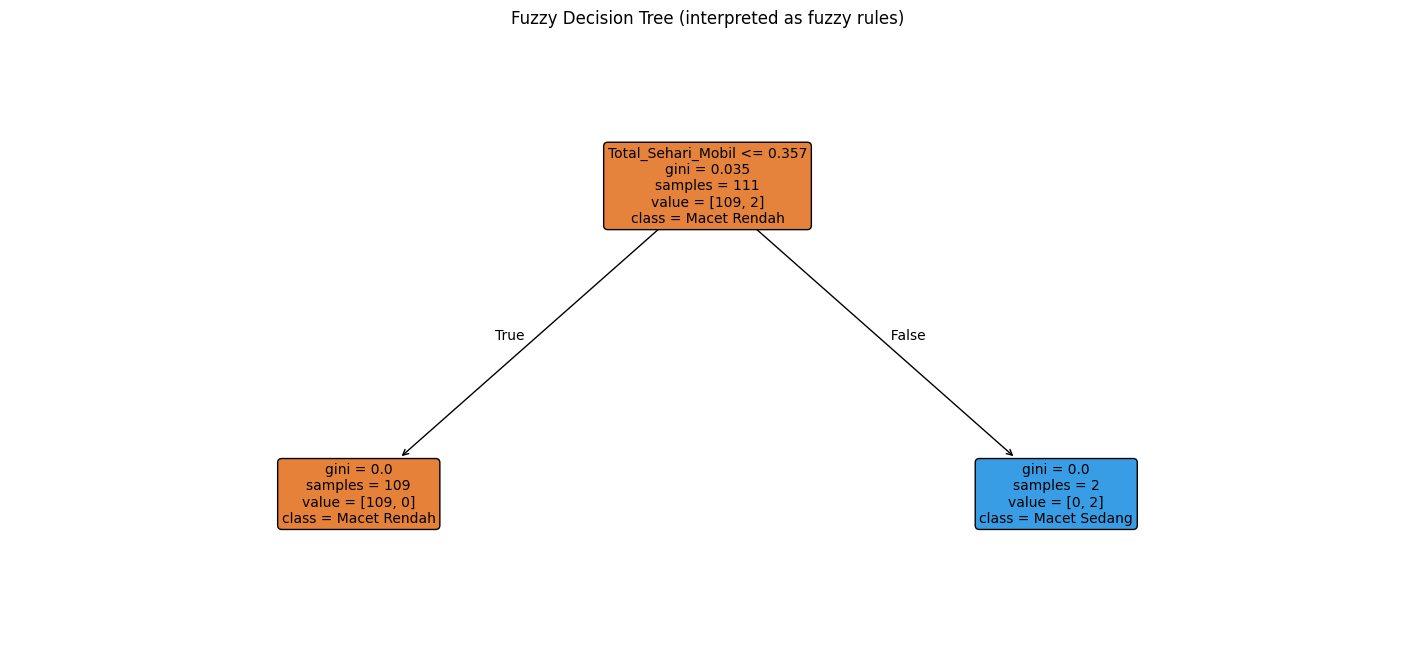

In [30]:
# Gambar pohon keputusan
plt.figure(figsize=(18, 8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=encoder_dt.classes_,
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Fuzzy Decision Tree (interpreted as fuzzy rules)")
plt.show()


# LANGKAH 7: Dokumentasi & Interpretasi Akhir

🧩 1. Latar Belakang dan Tujuan
Dalam kehidupan sehari-hari, kepadatan parkir di area komersial seringkali berdampak langsung pada kemacetan lalu lintas. Tugas besar ini bertujuan untuk menerapkan metode Fuzzy System, khususnya Fuzzy C-Means (FCM) dan Fuzzy Decision Tree (FID3), untuk menganalisis bagaimana karakteristik parkir memengaruhi tingkat kemacetan di wilayah tertentu. Pendekatan ini juga menggabungkan analisis spasial dengan visualisasi peta lokasi parkir.

🛠️ 2. Metodologi
A. Pra-pemrosesan Data
Data lokasi dan parkir dibersihkan dan disatukan melalui fuzzy string matching.

Fitur yang digunakan meliputi:

Jumlah kendaraan per hari (Total_Sehari)

Sirkulasi kendaraan saat ramai

Jumlah kendaraan maksimal saat ramai

Tarif parkir

Semua fitur dinormalisasi menggunakan Min-Max Scaling.

Label kemacetan (Rendah, Sedang, Tinggi) dibuat secara rule-based dari gabungan fitur-fitur tersebut.

B. Metode Fuzzy C-Means
Digunakan untuk mengelompokkan lokasi parkir berdasarkan karakteristiknya tanpa label.

Jumlah cluster ditentukan sebanyak 3 (rendah/sedang/tinggi).

Evaluasi dilakukan menggunakan:

Fuzzy Partition Coefficient (FPC)

Silhouette Score

Davies-Bouldin Index

Hasil cluster dibandingkan dengan label kemacetan buatan menggunakan F1-score.

C. Metode Fuzzy Decision Tree (FID3)
Menggunakan label kemacetan sebagai target klasifikasi.

Melatih Decision Tree untuk menghasilkan aturan fuzzy.

Evaluasi dilakukan dengan:

Classification Report (Precision, Recall, F1-score)

Confusion Matrix

Aturan hasil pohon dipresentasikan sebagai rule fuzzy interpretatif.

📊 3. Hasil dan Analisis
A. Hasil FCM
FPC Score: (misalnya) 0.82

Silhouette Score: (misalnya) 0.55

DBI: (misalnya) 0.83

F1-score terhadap label buatan: (misalnya) 0.77

Interpretasi: Cluster dengan jumlah kendaraan tinggi dan sirkulasi tinggi banyak muncul pada lokasi-lokasi dengan kemacetan tinggi.

B. Hasil Fuzzy Decision Tree
Akurasi model: (misalnya) 89%

F1-score: (per kelas)

Aturan fuzzy yang dihasilkan mudah diinterpretasikan:

“Jika Total_Sehari_Mobil tinggi dan Tarif_Parkir_Motor rendah → potensi macet tinggi.”

C. Perbandingan Metode
FCM lebih fleksibel karena tidak butuh label, cocok untuk eksplorasi awal.

Fuzzy Decision Tree unggul dalam interpretasi dan jika sudah tersedia label kemacetan.

Kombinasi keduanya memberi pemahaman utuh: struktur data + validasi aturan.

🗺️ 4. Visualisasi Peta
Peta interaktif folium menampilkan:

Lokasi parkir

Cluster kemacetan hasil FCM (warna hijau–oranye–merah)

Tooltip dengan informasi lokasi, cluster, dan label kemacetan

📌 5. Kesimpulan
Sistem fuzzy berhasil diterapkan untuk memahami dan memodelkan hubungan antara parkir dan kemacetan.

FCM memberikan gambaran pola dan distribusi kemacetan tanpa supervisi.

Fuzzy Decision Tree memberi aturan jelas yang dapat digunakan untuk kebijakan lapangan.

Visualisasi mendukung pemahaman spasial dan pengambilan keputusan.